# Amsterdam Event Data

## Table of Contents
1. [Imports](#imports)
2. [Import File](#importFile)
    1. [Example Contents](#exampleContents)
3. [Construction Full DataFrame](#fullDF)
4. [DataaFrame to CSV](#CSV)

## Imports <a name="imports"></a>

In [153]:
#Read JSON files
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#Visualizations
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

## Import Events file <a name="importFile"></a>
Import the open data file 

In [154]:
with open("../../../Data_thesis/Open_Data/Evenementen.json") as event_data:
    events = json.load(event_data)

In [142]:
road_map = gpd.read_file("../../../Data_thesis/EventShapeFiles/roads.shp")

### Example contents <a name="exampleContents"></a>
Below is an example snippet of an event in the file

In [155]:
#Return eventname
print("Event: ", events[0]["title"])

#Return exact location event in human terms
print("City: ", events[0]["location"]["city"])
print("Adress: ", events[0]["location"]["adress"])
print("Zipcode: ", events[0]["location"]["zipcode"])

#Check source crowdedness
print("Coordinates: ", events[0]["location"]["latitude"], events[0]["location"]["longitude"]) 

#Check whether the data has an event
print("Date: ", events[0]["dates"])

Event:  Springsnow Festival
City:  AMSTERDAM
Adress:  Diverse locaties / Various locations
Zipcode:  1012 JS
Coordinates:  52,3726380 4,8941060
Date:  {'startdate': '20-04-2018', 'enddate': '20-05-2018'}


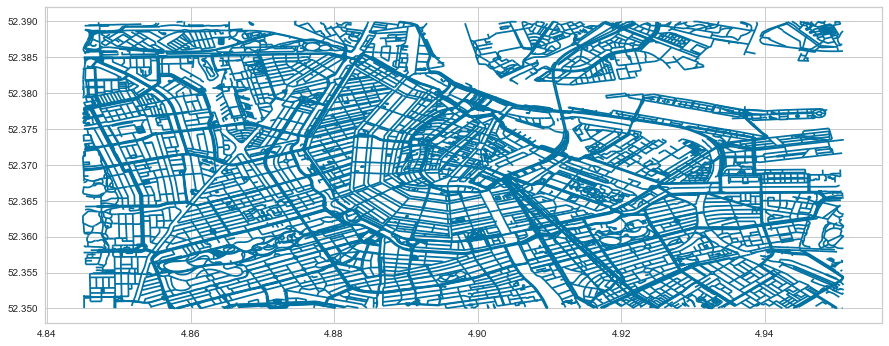

In [143]:
#Map of amsterdam
fig,ax = plt.subplots(figsize = (15, 15))
road_map.plot(ax=ax)

## Full Dataset <a name="fullDF"></a>
As not all the variables are usable, we make a subset of the following variables:
- *Event Name*: Show the event name
- *Coordinates*: Show the coordinates of the event
- *Data*: Show the event date(s)

In [156]:
#Save all the events in the list
events_dict = {}

#Start date
start = datetime.date(2018, 1, 1)

#End date
end = datetime.date(2019, 4, 30)

#Loop over all the events
j = 0
for event in events: 
    #Temporary save dates
    dates = []
    
    lat = float(event["location"]["latitude"].replace(",", "."))
    lon = float(event["location"]["longitude"].replace(",", "."))
    
    if lon > 4.88 and lon < 4.92 and lat > 52.36 and lat < 52.39:
    
        #Check if saved in format one or two
        if "startdate" in event["dates"]: 
            dates.append(event["dates"]["startdate"])
            dates.append(event["dates"]["enddate"])
        elif "singles" in event["dates"]:
            dates = event["dates"]["singles"]
            
        dates = [datetime.datetime.strptime(date, "%d-%m-%Y").date() for date in dates]
        
        for date in dates:
            if start < date < end:

                #Dict with all data single event
                event_date = {"Date": date, "Event": event["title"], "Latitude": lat,"Longtitude": lon}

                #Append dict to list
                events_dict[j] = event_date
                j += 1

In [157]:
df = pd.DataFrame.from_dict(events_dict, orient="index")

In [158]:
df.head()

,Date,Event,Latitude,Longtitude
0,2018-04-20,Springsnow Festival,52.372638,4.894106
1,2018-05-20,Springsnow Festival,52.372638,4.894106
2,2018-06-02,Holland Festival,52.361582,4.885479
3,2018-06-03,Holland Festival,52.361582,4.885479
4,2018-06-04,Holland Festival,52.361582,4.885479


## Visualizations 

### Event Names

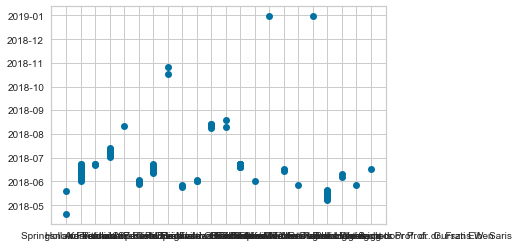

In [134]:
plt.plot_date(df["Event"], df["Date"], xdate=False, ydate=True)

### Coordinates
Inspired by [this blog](https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972)

In [144]:
crs = {"init": "epsg:4326"}

In [145]:
names = df.Event.unique()

In [146]:
#Create a point object -> Point is essentially a single object that describes the longitude and latitude of a data-point
geometry = [Point(xy) for xy in zip(df["Longtitude"], df["Latitude"])]

In [147]:
geometry[:3]

In [148]:
geo_df = gpd.GeoDataFrame(df,
                         crs = crs,
                         geometry = geometry)

In [149]:
geo_df.head()

,Date,Event,Latitude,Longtitude,geometry
0,2018-04-20,Springsnow Festival,52.372638,4.894106,POINT (4.894106 52.372638)
1,2018-05-20,Springsnow Festival,52.372638,4.894106,POINT (4.894106 52.372638)
2,2018-06-02,Holland Festival,52.361582,4.885479,POINT (4.885479 52.361582)
3,2018-06-03,Holland Festival,52.361582,4.885479,POINT (4.885479 52.361582)
4,2018-06-04,Holland Festival,52.361582,4.885479,POINT (4.885479 52.361582)


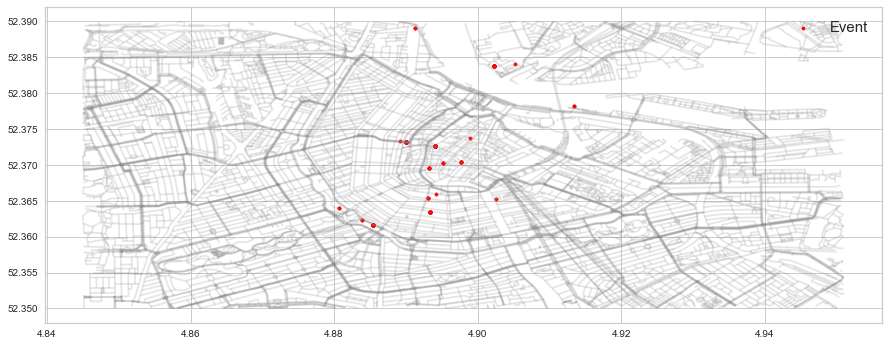

In [150]:
fig,ax = plt.subplots(figsize = (15, 15))
road_map.plot(ax = ax, alpha = 0.2, color = "grey")
geo_df[geo_df["Event"].isin(names)].plot(ax = ax, markersize = 12, color = "red", marker = "o", label = "Event")
plt.legend(prop={"size": 15})

## Save to file <a name="CSV"></a>
Save the list of subset events to file

In [159]:
df.to_csv("../../../Data_thesis/Full_Datasets/Events.csv", index=False)